In [35]:
import numpy as np
import pandas as pd 
from sklearn.cluster import AgglomerativeClustering as AG
from scipy.cluster.hierarchy import dendrogram 
import scipy
import os
import sys
import cluster
import plots
import svd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
df = pd.read_csv('test_data.csv', index_col='Resi')

In [8]:
df

,R,Q,N,A,G,S,V
Resi,,,,,,,
2.0,4.24800,4.21325,4.23050,4.22100,4.21550,4.18525,4.21550
5.0,4.16475,4.15050,4.15000,4.15925,4.11000,4.15925,4.14350
6.1,6.35550,6.35675,6.35550,6.34725,6.33775,6.34725,6.35575
6.2,7.13475,7.13475,7.13475,7.12125,7.12125,7.12125,7.12125
11.0,4.29475,4.29975,4.30900,4.32100,4.32100,4.32850,4.32100
...,...,...,...,...,...,...,...
561.2,7.43425,7.42650,7.41775,7.41100,7.41100,7.32025,7.41100
564.0,6.77375,6.76675,6.75150,6.75525,6.75525,6.75525,6.75525
565.0,6.34150,6.33350,6.33625,6.33000,6.32975,6.33000,6.33475


In [19]:
hag = cluster.HAG(df)

In [7]:
hag.absolute_corr

Resi,2.0,5.0,6.1,6.2,11.0,17.1,17.2,19.1,24.0,25.1,...,547.1,547.2,548.1,548.2,561.1,561.2,564.0,565.0,569.0,574.0
Resi,,,,,,,,,,,,,,,,,,,,,
2.0,1.000000,0.137274,0.368572,0.597637,0.736154,0.570612,0.077311,0.563160,0.530732,0.100531,...,0.741131,0.745840,0.179468,0.621193,0.459797,0.847799,0.480482,0.780938,0.563317,0.024305
5.0,0.137274,1.000000,0.640432,0.353062,0.305640,0.345321,0.773849,0.375414,0.308501,0.702498,...,0.345383,0.340090,0.471566,0.361277,0.451926,0.136114,0.368825,0.417259,0.494701,0.190477
6.1,0.368572,0.640432,1.000000,0.674499,0.620304,0.676767,0.256114,0.665614,0.840462,0.254942,...,0.459392,0.441274,0.403747,0.675250,0.666372,0.343246,0.401282,0.713987,0.023588,0.461854
6.2,0.597637,0.353062,0.674499,1.000000,0.919941,0.998364,0.294448,0.948393,0.917702,0.341702,...,0.731378,0.715315,0.576937,0.994038,0.979031,0.529261,0.580026,0.738922,0.001238,0.680953
11.0,0.736154,0.305640,0.620304,0.919941,1.000000,0.921647,0.091645,0.970500,0.878725,0.109065,...,0.630102,0.618805,0.356236,0.891078,0.860937,0.704197,0.802945,0.796962,0.147079,0.485499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561.2,0.847799,0.136114,0.343246,0.529261,0.704197,0.528644,0.318976,0.543312,0.587993,0.288282,...,0.377998,0.375542,0.375909,0.516512,0.353488,1.000000,0.406971,0.536342,0.800493,0.128665
564.0,0.480482,0.368825,0.401282,0.580026,0.802945,0.588827,0.005861,0.790631,0.559764,0.039342,...,0.300120,0.295742,0.325469,0.517872,0.572622,0.406971,1.000000,0.637796,0.143979,0.346507
565.0,0.780938,0.417259,0.713987,0.738922,0.796962,0.713946,0.009752,0.733411,0.755109,0.031597,...,0.823401,0.819044,0.311282,0.758177,0.679576,0.536342,0.637796,1.000000,0.107725,0.459570


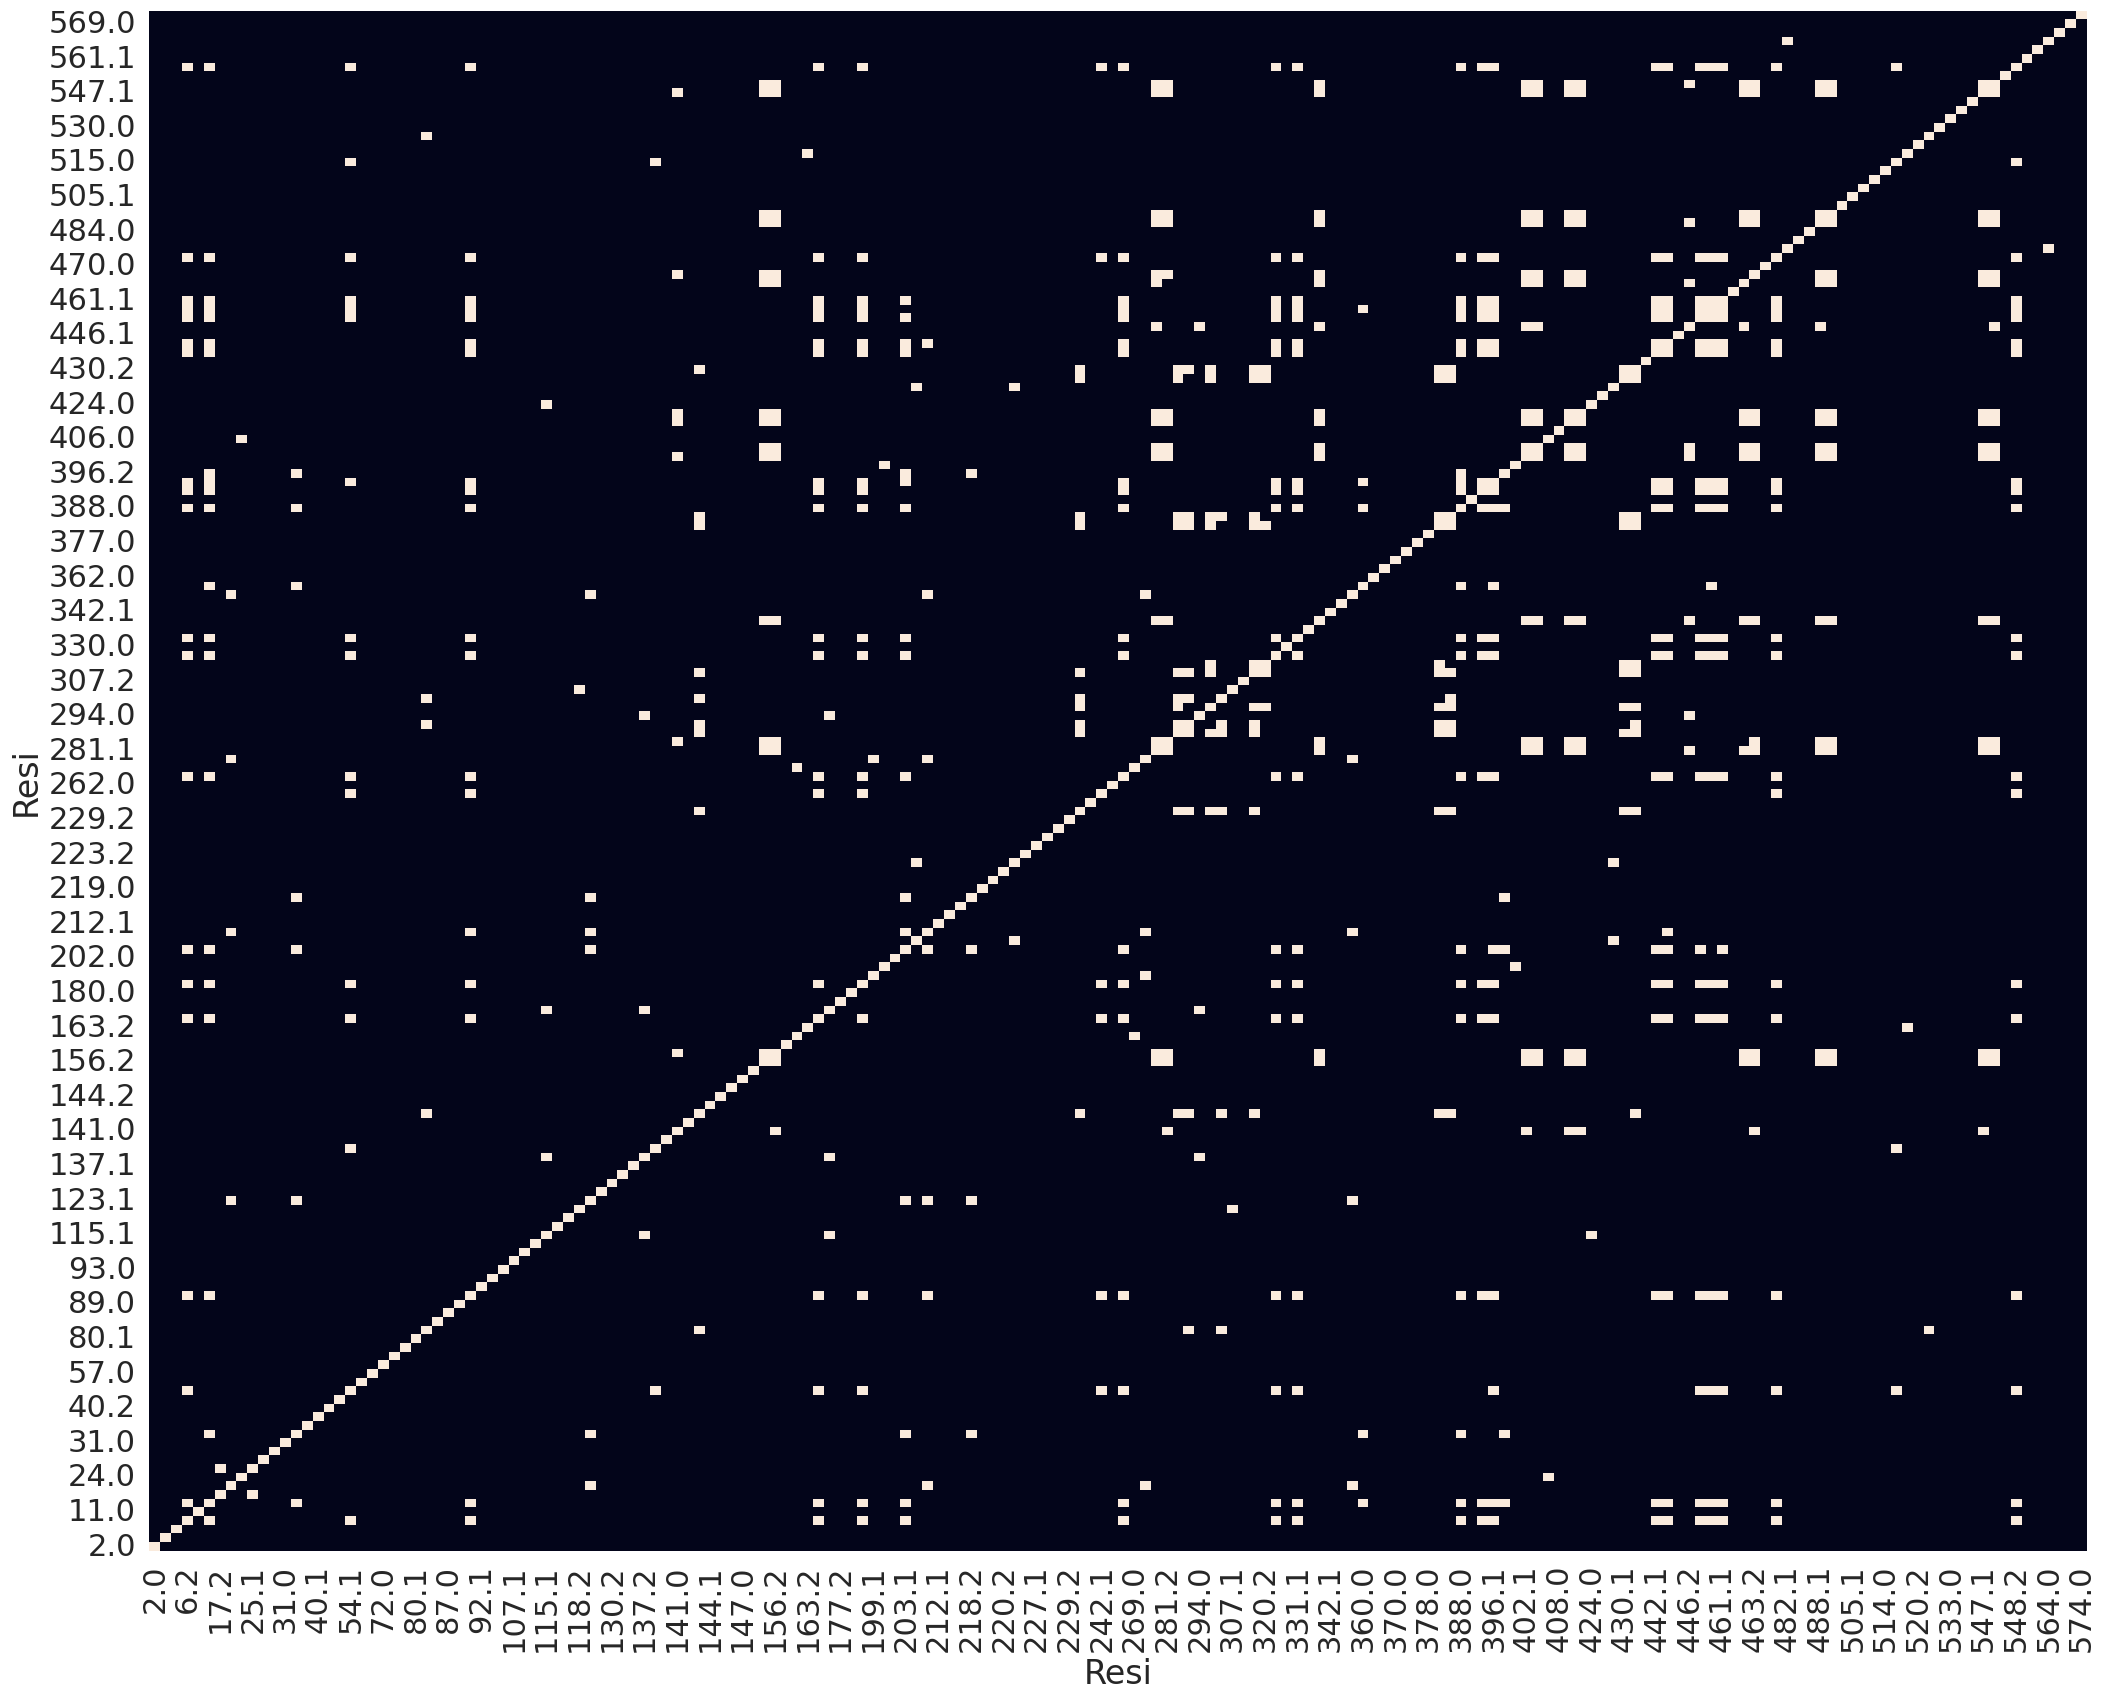

In [16]:
plots.plot_corr(hag)

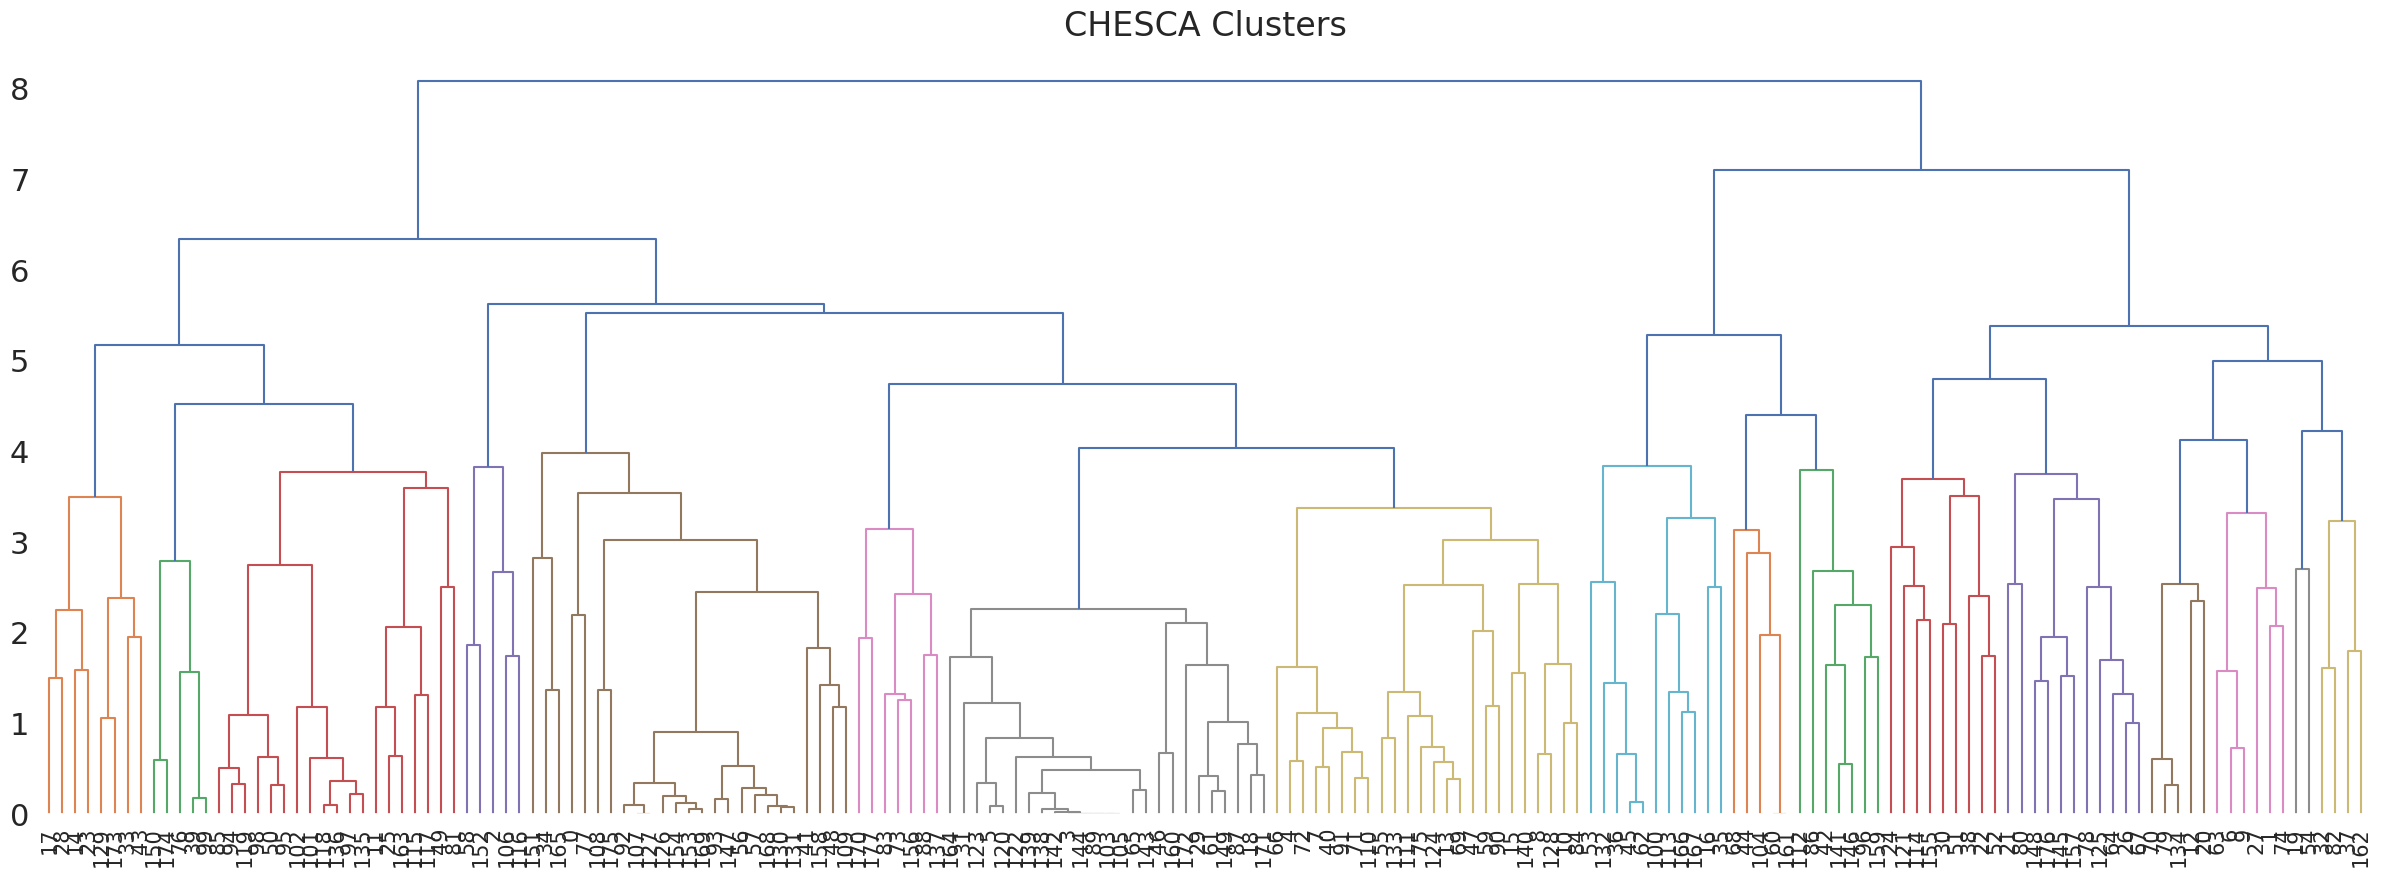

In [23]:
plots.show_dendrogram(hag,cutoff=96)

In [36]:
dims = svd.SVD(df)

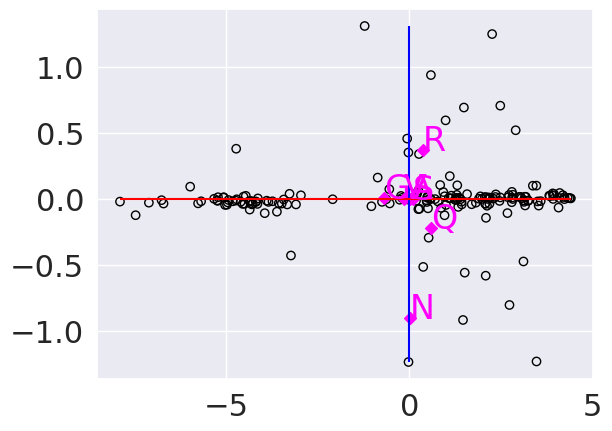

In [46]:
plots.plot_svd(dims)

In [86]:
df.T.corr().abs().fillna(0)

Resi,2.0,5.0,6.1,6.2,11.0,17.1,17.2,19.1,24.0,25.1,...,547.1,547.2,548.1,548.2,561.1,561.2,564.0,565.0,569.0,574.0
Resi,,,,,,,,,,,,,,,,,,,,,
2.0,1.000000,0.137274,0.368572,0.597637,0.736154,0.570612,0.077311,0.563160,0.530732,0.100531,...,0.741131,0.745840,0.179468,0.621193,0.459797,0.847799,0.480482,0.780938,0.563317,0.024305
5.0,0.137274,1.000000,0.640432,0.353062,0.305640,0.345321,0.773849,0.375414,0.308501,0.702498,...,0.345383,0.340090,0.471566,0.361277,0.451926,0.136114,0.368825,0.417259,0.494701,0.190477
6.1,0.368572,0.640432,1.000000,0.674499,0.620304,0.676767,0.256114,0.665614,0.840462,0.254942,...,0.459392,0.441274,0.403747,0.675250,0.666372,0.343246,0.401282,0.713987,0.023588,0.461854
6.2,0.597637,0.353062,0.674499,1.000000,0.919941,0.998364,0.294448,0.948393,0.917702,0.341702,...,0.731378,0.715315,0.576937,0.994038,0.979031,0.529261,0.580026,0.738922,0.001238,0.680953
11.0,0.736154,0.305640,0.620304,0.919941,1.000000,0.921647,0.091645,0.970500,0.878725,0.109065,...,0.630102,0.618805,0.356236,0.891078,0.860937,0.704197,0.802945,0.796962,0.147079,0.485499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561.2,0.847799,0.136114,0.343246,0.529261,0.704197,0.528644,0.318976,0.543312,0.587993,0.288282,...,0.377998,0.375542,0.375909,0.516512,0.353488,1.000000,0.406971,0.536342,0.800493,0.128665
564.0,0.480482,0.368825,0.401282,0.580026,0.802945,0.588827,0.005861,0.790631,0.559764,0.039342,...,0.300120,0.295742,0.325469,0.517872,0.572622,0.406971,1.000000,0.637796,0.143979,0.346507
565.0,0.780938,0.417259,0.713987,0.738922,0.796962,0.713946,0.009752,0.733411,0.755109,0.031597,...,0.823401,0.819044,0.311282,0.758177,0.679576,0.536342,0.637796,1.000000,0.107725,0.459570


In [112]:
cmap(norm(.975))

(0.25546457, 0.13661751, 0.16248722, 1.0)

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
cmap = sns.color_palette('icefire', as_cmap=True)
norm = plt.Normalize(vmin=min_corr, vmax=1)  # 0 and 1 are the defaults, but you can adapt these to fit other uses
palette = sns.color_palette([cmap(norm(h)) for h in np.linspace(min_corr,1,100)])

In [114]:
palette

[(0.73936227, 0.90443867, 0.85757238),
 (0.71834255, 0.88842162, 0.8521605),
 (0.68629021, 0.86497329, 0.84398721),
 (0.66448539, 0.84971123, 0.83868005),
 (0.63117745, 0.827294, 0.83113431),
 (0.60879435, 0.81256797, 0.82648905),
 (0.57489525, 0.7907688, 0.82022901),
 (0.54052516, 0.76927562, 0.81491462),
 (0.51728854, 0.75509528, 0.81194156),
 (0.48183174, 0.73401449, 0.80839675),
 (0.45770893, 0.72006648, 0.80667756),
 (0.42110294, 0.69916972, 0.80506683),
 (0.38632002, 0.67781125, 0.80431024),
 (0.36442578, 0.66328229, 0.80417474),
 (0.33355526, 0.64107876, 0.80445484),
 (0.31434372, 0.62600624, 0.8049475),
 (0.28759072, 0.60300319, 0.80616055),
 (0.27114651, 0.5874047, 0.80730545),
 (0.248686, 0.56358255, 0.80961366),
 (0.22921445, 0.53918506, 0.81267292),
 (0.21977058, 0.52241482, 0.81457651),
 (0.21372783, 0.49630865, 0.81589566),
 (0.2157176, 0.47827123, 0.81487615),
 (0.22665681, 0.45052233, 0.80860217),
 (0.24298285, 0.42261123, 0.79493267),
 (0.25423116, 0.40433127, 0.78155831),
 (0.26901584, 0.37779582, 0.75621942),
 (0.27690355, 0.3607736, 0.73659374),
 (0.28535896, 0.33660243, 0.70303975),
 (0.28816354, 0.32200604, 0.67684067),
 (0.28770912, 0.30250126, 0.63331265),
 (0.28233561, 0.28527482, 0.58742866),
 (0.27665361, 0.27465357, 0.55667809),
 (0.2659204, 0.25949691, 0.511417),
 (0.2577151, 0.24971691, 0.48214874),
 (0.24433654, 0.23539226, 0.4397245),
 (0.23018113, 0.22132414, 0.39945577),
 (0.22048761, 0.21211723, 0.37372555),
 (0.20586893, 0.19855368, 0.33701661),
 (0.19619947, 0.18972425, 0.31383846),
 (0.18201285, 0.17694992, 0.28088776),
 (0.16868273, 0.16479861, 0.25034479),
 (0.16043195, 0.15714351, 0.23141745),
 (0.14918274, 0.14653431, 0.20529486),
 (0.14254381, 0.14016944, 0.18944326),
 (0.13405762, 0.13188822, 0.16820842),
 (0.12948748, 0.12733187, 0.15580631),
 (0.12442647, 0.12213143, 0.13992571),
 (0.12166209, 0.11907077, 0.12749671),
 (0.12114244, 0.11829179, 0.1212385),
 (0.12619498, 0.11721796, 0.11770203),
 (0.13410011, 0.11625146, 0.11839138),
 (0.148417, 0.11626929, 0.12125453),
 (0.16533376, 0.11797856, 0.12621303),
 (0.17797765, 0.11994436, 0.13058435),
 (0.19884415, 0.12394381, 0.1385669),
 (0.21394877, 0.12718055, 0.14472604),
 (0.23823937, 0.13267611, 0.15502793),
 (0.25546457, 0.13661751, 0.16248722),
 (0.28264773, 0.14277192, 0.1743957),
 (0.31129002, 0.14897583, 0.18695213),
 (0.33107961, 0.1530674, 0.19543758),
 (0.36178937, 0.1589124, 0.20807639),
 (0.38288348, 0.16254006, 0.2163249),
 (0.41537995, 0.16745325, 0.2282297),
 (0.44878564, 0.1716535, 0.23932344),
 (0.47151732, 0.17401641, 0.24610337),
 (0.50623876, 0.17687777, 0.255096),
 (0.52975234, 0.17835232, 0.2601134),
 (0.56541729, 0.18010175, 0.26575971),
 (0.60127582, 0.18175888, 0.26858488),
 (0.62506376, 0.18324015, 0.26858301),
 (0.65988195, 0.18734638, 0.26543435),
 (0.68209194, 0.19216636, 0.26137175),
 (0.71375229, 0.20276438, 0.25331365),
 (0.73407638, 0.21145051, 0.24710661),
 (0.7630579, 0.22731637, 0.23700095),
 (0.78979746, 0.24694858, 0.22678822),
 (0.80630444, 0.26198807, 0.22040877),
 (0.82915955, 0.28696963, 0.21210766),
 (0.84322168, 0.30491136, 0.20766435),
 (0.86286243, 0.33312058, 0.20274969),
 (0.88100349, 0.36243385, 0.19999078),
 (0.89203964, 0.38273475, 0.20013431),
 (0.90648379, 0.41460191, 0.20558847),
 (0.91463791, 0.43668557, 0.21367954),
 (0.92491786, 0.4705936, 0.23308207),
 (0.93073701, 0.49341219, 0.25065486),
 (0.93850535, 0.52748892, 0.28242464),
 (0.94563159, 0.56110987, 0.31891624),
 (0.95020929, 0.5832232, 0.34508419),
 (0.95698411, 0.61595766, 0.38629631),
 (0.9615041, 0.6375203, 0.41474106),
 (0.96809871, 0.66971662, 0.45830232),
 (0.97450723, 0.70187358, 0.50178034),
 (0.97871716, 0.72330511, 0.53074053),
 (0.98497466, 0.75547635, 0.57420239),
 (0.98913325, 0.77695637, 0.60321626),
 (0.99535958, 0.80926704, 0.64687278),
 (0.9992197, 0.83100723, 0.6764127)]

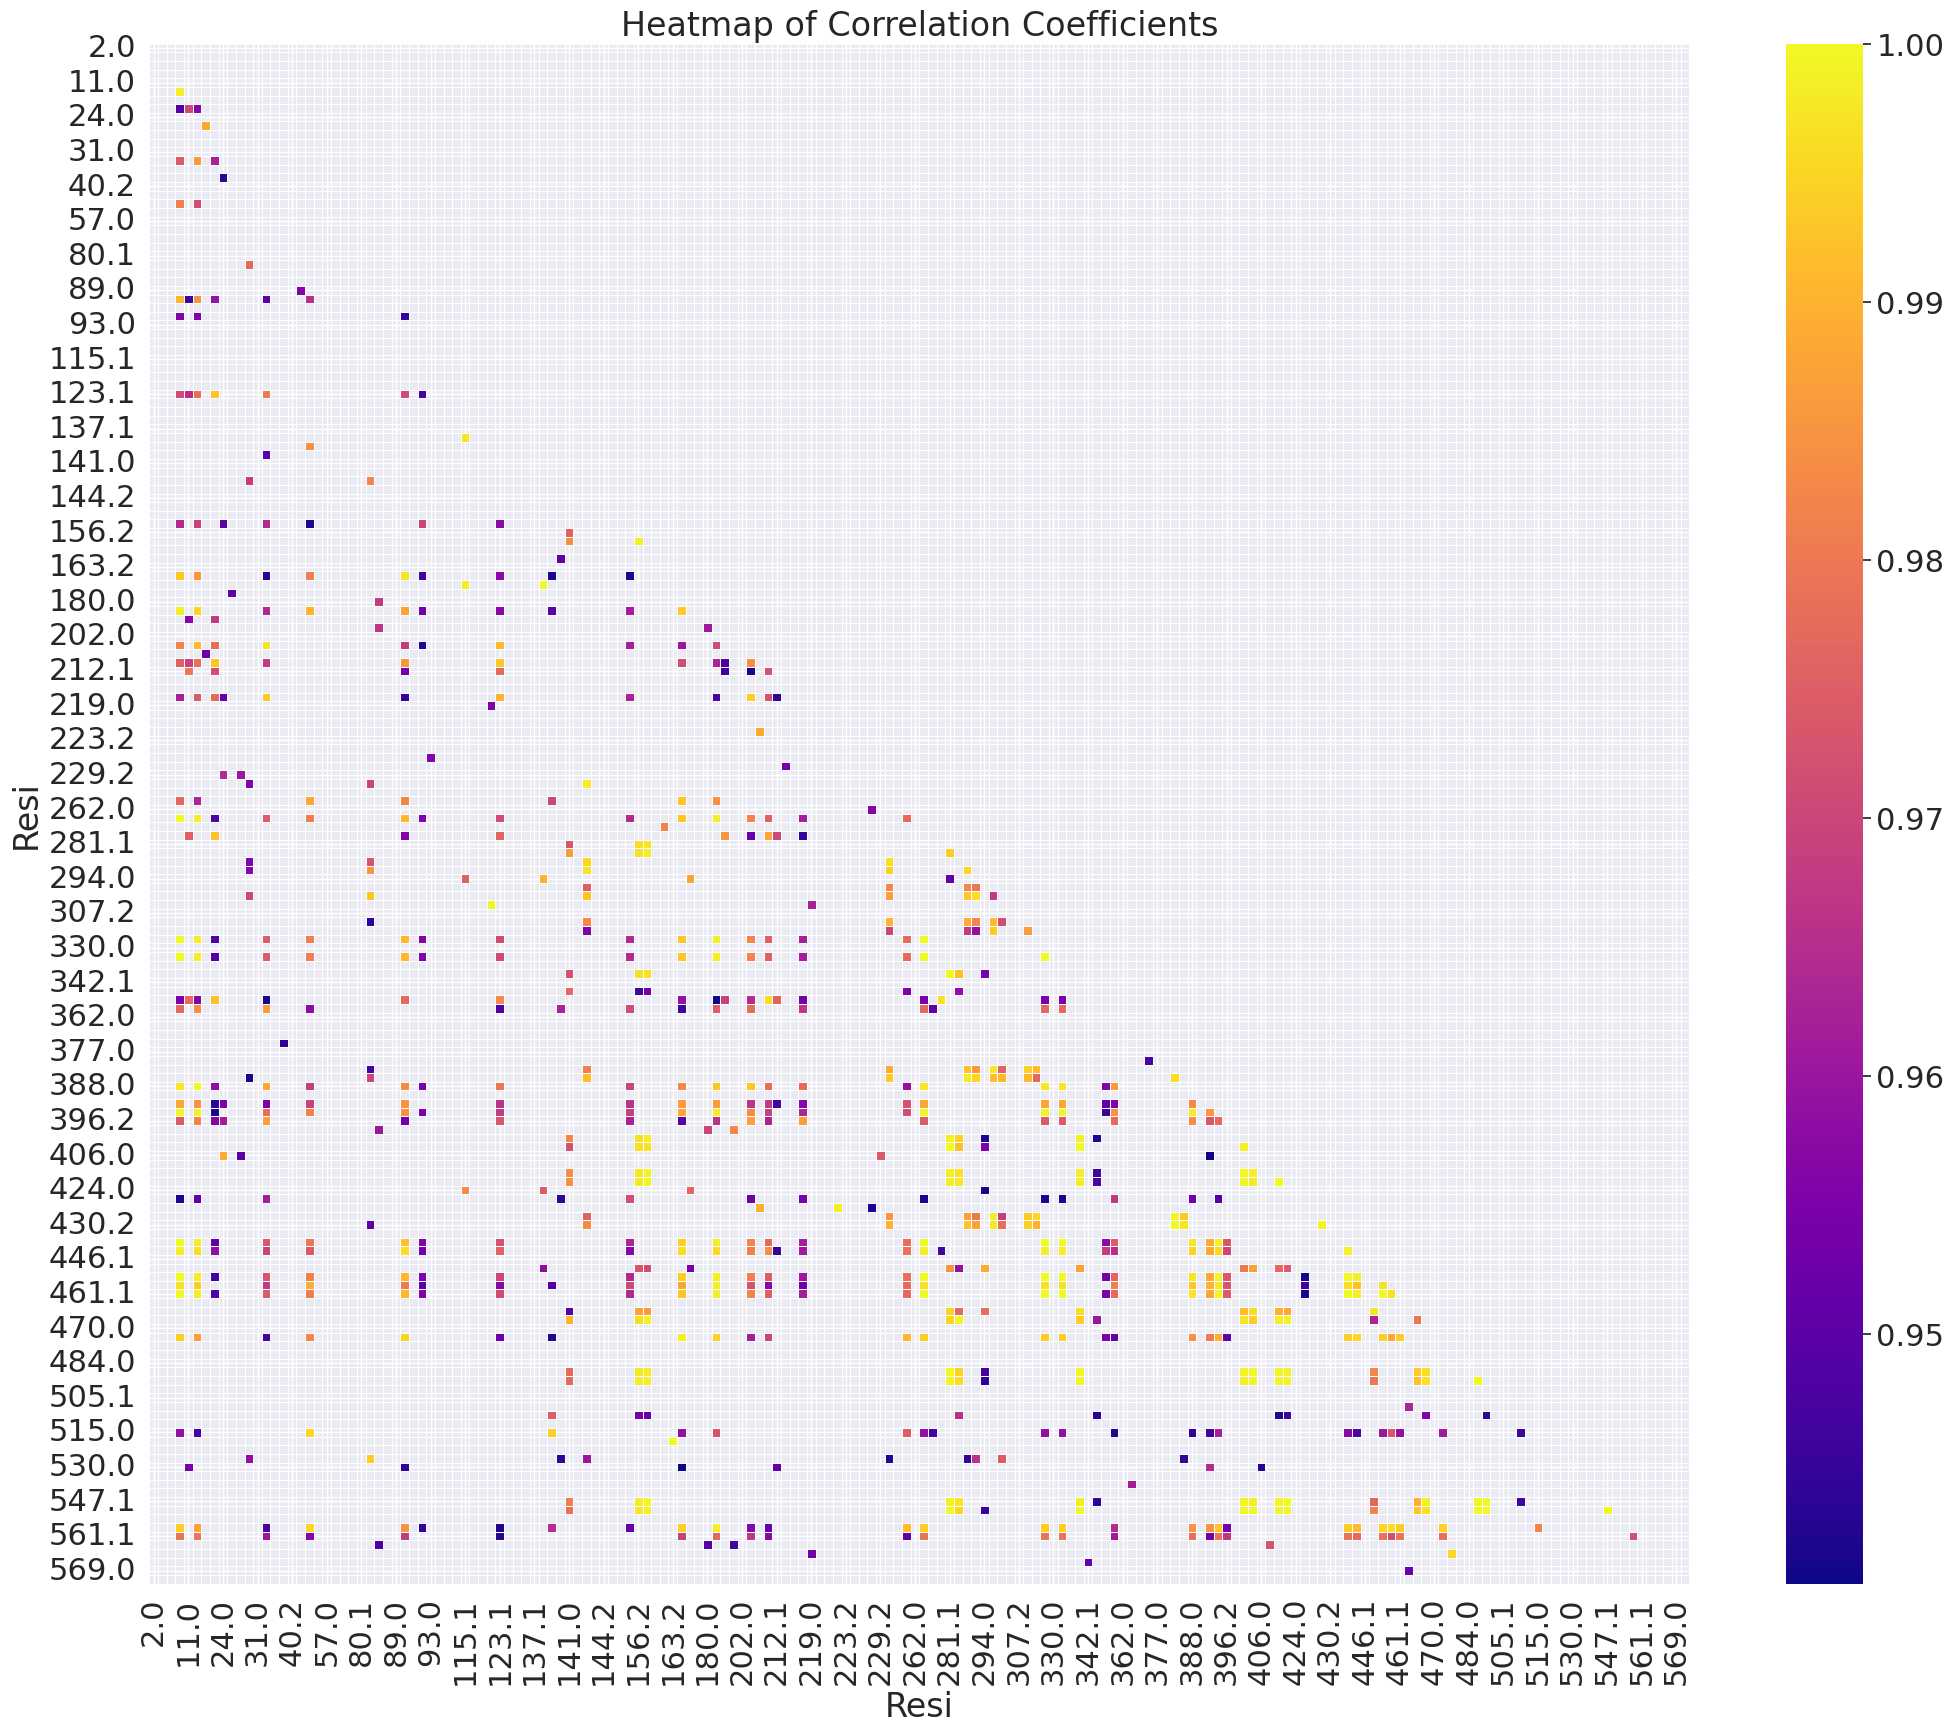

In [136]:
plots.heatmap_correlation_cutoffs(df)

In [129]:
corr.clip(lower=.94).min().min()

0.94

<Axes: xlabel='Resi', ylabel='Resi'>

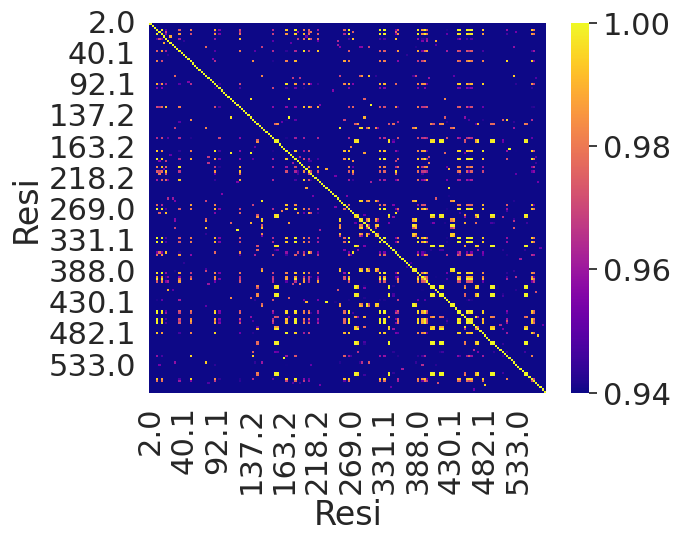

In [133]:
corr = df.T.corr().abs().fillna(0)
sns.heatmap(corr.clip(lower=94/100),cmap='plasma')